In [1]:
!pip install torchviz

In [2]:
from numba import cuda
cuda.select_device(0)
cuda.close()

In [3]:
import sys
sys.path.append("..")

from dataset.CustomDataset import CustomDataset
import train
from datetime import datetime
from torch import nn

import torch
from torchviz import make_dot
from train import get_dataset
import pandas as pd

import seaborn as sns; sns.set(); sns.set(style="whitegrid", color_codes=True)
import matplotlib.pyplot as plt

In [4]:
num_epochs = 200
batch_size = 1000
runs_num = 15

In [5]:
def collect_data_runs(config_model, runs_num=10):
    data = []
    
    for run in range(runs_num): 
        print(f"---- Run {run+1}/{runs_num} ----")
        model, history = train.train(config_model)
        
        for i in range(len(history.epochs)):
            data.append([run, history.epochs[i], history.losses_train[i], history.losses_test[i], history.accs_train[i], history.accs_test[i]])

    df = pd.DataFrame(data, columns=["run", "epoch", "train_loss", "test_loss", "train_accuracy", "test_accuracy"])
    
    return df, model, history

In [6]:
def plot_result(df):
    fig, axs = plt.subplots(2, 1, figsize=(10,16))
    sns.lineplot(x="epoch", y="test_loss", data=df, ax=axs[0], color="red", label="test");
    sns.lineplot(x="epoch", y="train_loss", data=df, ax=axs[0], color="blue", label="train");
    axs[0].set_xlabel("epochs");axs[0].set_ylabel("Loss");axs[0].set_title("Loss", fontdict={"fontsize":20, "fontweight":1}, pad=15);
    axs[0].legend();

    sns.lineplot(x="epoch", y="test_accuracy", data=df, ax=axs[1], color="red", label="test");
    sns.lineplot(x="epoch", y="train_accuracy", data=df, ax=axs[1], color="blue", label="train");
    axs[1].set_xlabel("epochs");axs[1].set_ylabel("Accuracy");axs[1].set_title("Accuracy", fontdict={"fontsize":20, "fontweight":1}, pad=15);
    axs[1].legend();

---

In [7]:
from architectures.SimpleConvNet import SimpleConvNet, SimpleConvNetDataset

In [8]:
# %load_ext tensorboard
# %tensorboard --logdir ./logs

config_model1 = dict(
    logs_dir=f'./logs/SimpleConvNet/{datetime.now().strftime("%Y%m%d_%H%M%S")}',
    dataset=SimpleConvNetDataset,
    criterion=nn.CrossEntropyLoss(),
    optimizer=torch.optim.Adam,
    learning_rate=0.001,
    batch_size=batch_size,
    num_epochs=num_epochs,  # 250
    model=SimpleConvNet(class_num=10, channels_in=1), #'simple_conv',
    augmentation=False,
    verbose=0
)

df1, model1, history1 = collect_data_runs(config_model1, runs_num=runs_num)

---- Run 1/15 ----
---- Run 2/15 ----
---- Run 3/15 ----
---- Run 4/15 ----
---- Run 5/15 ----
---- Run 6/15 ----
---- Run 7/15 ----
---- Run 8/15 ----
---- Run 9/15 ----
---- Run 10/15 ----
---- Run 11/15 ----
---- Run 12/15 ----
---- Run 13/15 ----
---- Run 14/15 ----
---- Run 15/15 ----


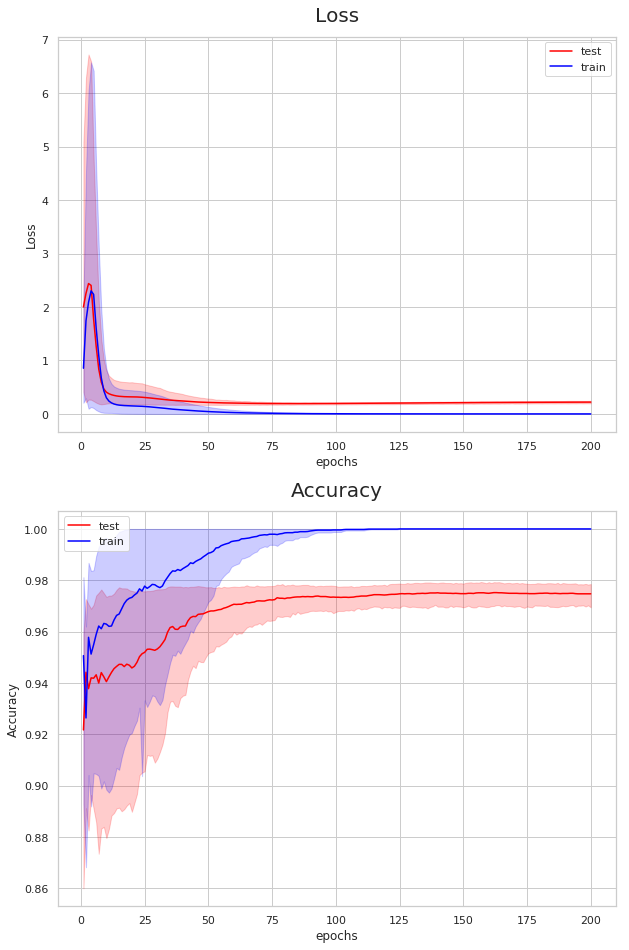

In [9]:
plot_result(df1)

In [10]:
config = dict(batch_size=128, dataset=SimpleConvNetDataset, augmentation=False, verbose=0)
training_loader, test_loader = get_dataset(config)
for i, j, k in training_loader:break

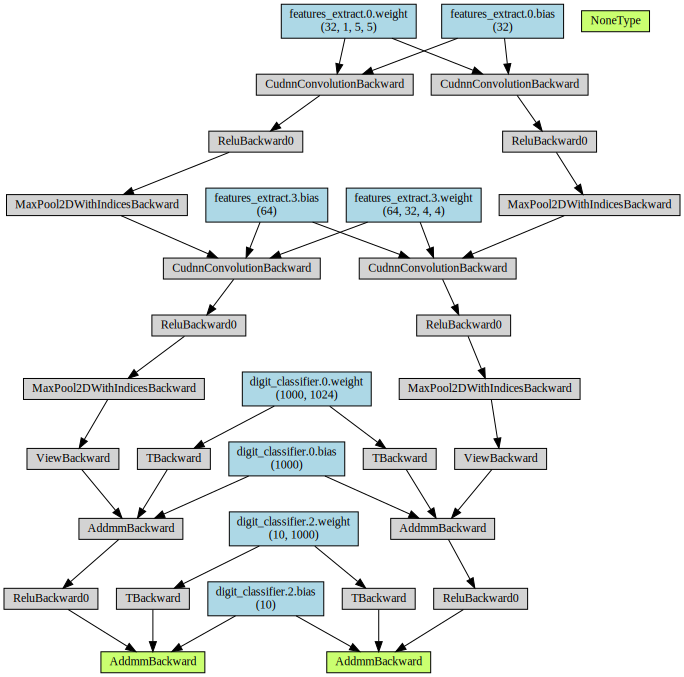

In [11]:
make_dot(model1(i.to('cuda')), params=dict(model1.named_parameters()))

---

In [12]:
from architectures.WeightSharing import WeightSharing, WeightSharingDataset

In [13]:
# %load_ext tensorboard
# %tensorboard --logdir ./logs

config_model2 = dict(
    logs_dir=f'./logs/WeightSharing/{datetime.now().strftime("%Y%m%d_%H%M%S")}',
    dataset=WeightSharingDataset,
    criterion=nn.CrossEntropyLoss(),
    optimizer=torch.optim.Adam,
    learning_rate=0.001,
    batch_size=batch_size,
    num_epochs=num_epochs,  # 250
    model=WeightSharing(), #'simple_conv',
    augmentation=False,
    verbose=0
)

df2, model2, history2 = collect_data_runs(config_model2, runs_num=runs_num)

---- Run 1/15 ----
---- Run 2/15 ----
---- Run 3/15 ----
---- Run 4/15 ----
---- Run 5/15 ----
---- Run 6/15 ----
---- Run 7/15 ----
---- Run 8/15 ----
---- Run 9/15 ----
---- Run 10/15 ----
---- Run 11/15 ----
---- Run 12/15 ----
---- Run 13/15 ----
---- Run 14/15 ----
---- Run 15/15 ----


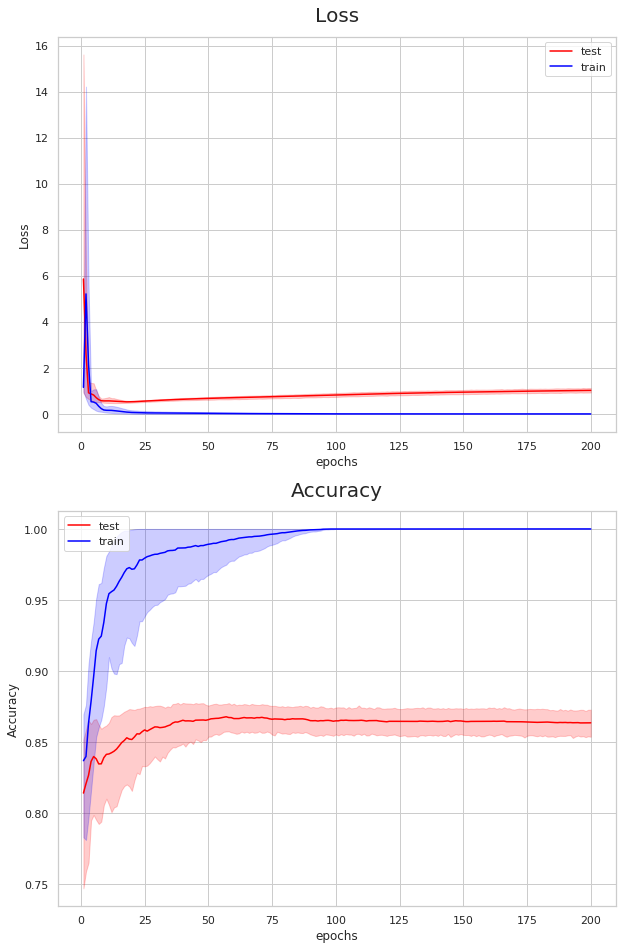

In [14]:
plot_result(df2)

In [15]:
config = dict(batch_size=128, dataset=WeightSharingDataset, augmentation=False, verbose=0)
training_loader, test_loader = get_dataset(config)
for i, j, k in training_loader:break

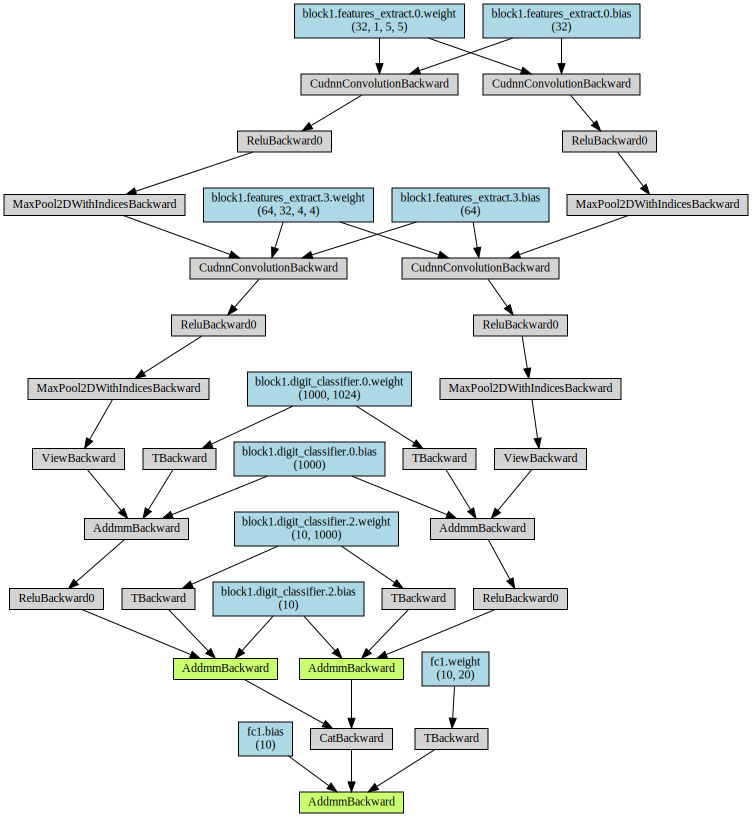

In [16]:
make_dot(model2(i.to('cuda')), params=dict(model2.named_parameters()))

---

In [17]:
from architectures.WeightSharing_AuxLosses import WeightSharingAuxLosses, WeightSharingAuxLossesDataset

In [18]:
# %load_ext tensorboard
# %tensorboard --logdir ./logs

config_model3 = dict(
    logs_dir=f'./logs/WeightSharingAuxLosses/{datetime.now().strftime("%Y%m%d_%H%M%S")}',
    dataset=WeightSharingAuxLossesDataset,
    criterion=nn.CrossEntropyLoss(),
    optimizer=torch.optim.Adam,
    learning_rate=0.001,
    batch_size=batch_size,
    num_epochs=num_epochs,  # 250
    model=WeightSharingAuxLosses(), #'simple_conv',
    augmentation=False,
    verbose=0
)

df3, model3, history3 = collect_data_runs(config_model3, runs_num=runs_num)

---- Run 1/15 ----
---- Run 2/15 ----
---- Run 3/15 ----
---- Run 4/15 ----
---- Run 5/15 ----
---- Run 6/15 ----
---- Run 7/15 ----
---- Run 8/15 ----
---- Run 9/15 ----
---- Run 10/15 ----
---- Run 11/15 ----
---- Run 12/15 ----
---- Run 13/15 ----
---- Run 14/15 ----
---- Run 15/15 ----


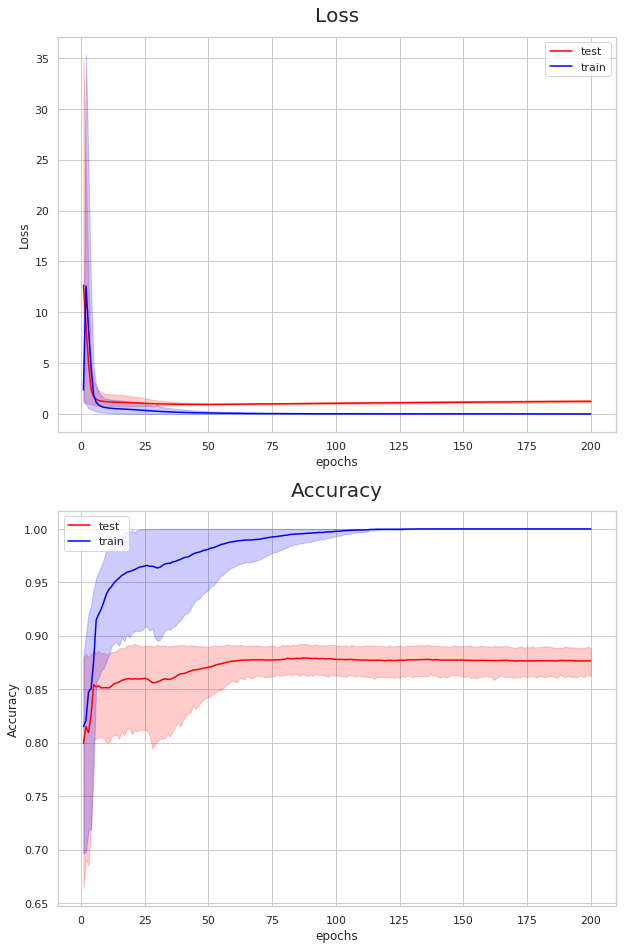

In [19]:
plot_result(df3)

In [20]:
config = dict(batch_size=128, dataset=WeightSharingAuxLossesDataset, augmentation=False, verbose=0)
training_loader, test_loader = get_dataset(config)
for i, j, k in training_loader:break

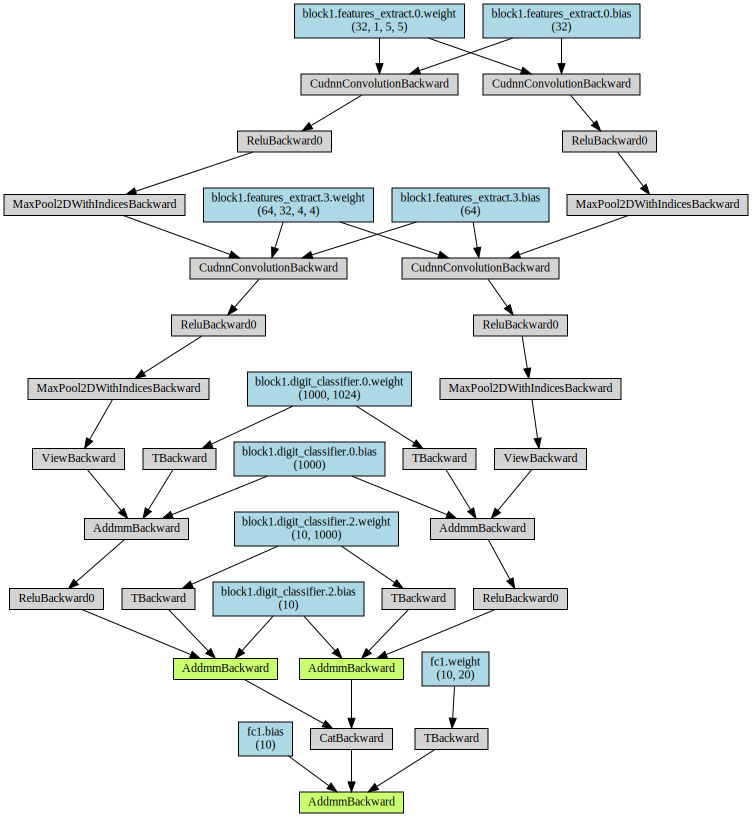

In [21]:
make_dot(model3(i.to('cuda')), params=dict(model3.named_parameters()))

---

In [22]:
from architectures.NoWeightSharing import NoWeightSharing, NoWeightSharingDataset

In [23]:
# %load_ext tensorboard
# %tensorboard --logdir ./logs

config_model4 = dict(
    logs_dir=f'./logs/NoWeightSharing/{datetime.now().strftime("%Y%m%d_%H%M%S")}',
    dataset=NoWeightSharingDataset,
    criterion=nn.CrossEntropyLoss(),
    optimizer=torch.optim.Adam,
    learning_rate=0.001,
    batch_size=batch_size,
    num_epochs=num_epochs,  # 250
    model=NoWeightSharing(), #'simple_conv',
    augmentation=False,
    verbose=0
)

df4, model4, history4 = collect_data_runs(config_model4, runs_num=runs_num)

---- Run 1/15 ----
---- Run 2/15 ----
---- Run 3/15 ----
---- Run 4/15 ----
---- Run 5/15 ----
---- Run 6/15 ----
---- Run 7/15 ----
---- Run 8/15 ----
---- Run 9/15 ----
---- Run 10/15 ----
---- Run 11/15 ----
---- Run 12/15 ----
---- Run 13/15 ----
---- Run 14/15 ----
---- Run 15/15 ----


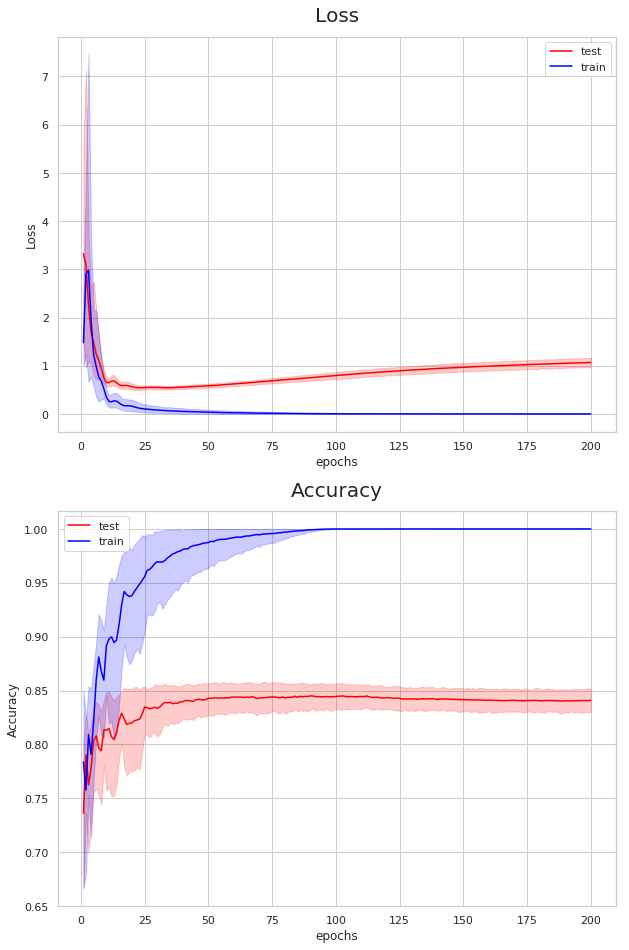

In [24]:
plot_result(df4)

In [25]:
config = dict(batch_size=128, dataset=NoWeightSharingDataset, augmentation=False, verbose=0)
training_loader, test_loader = get_dataset(config)
for i, j, k in training_loader:break

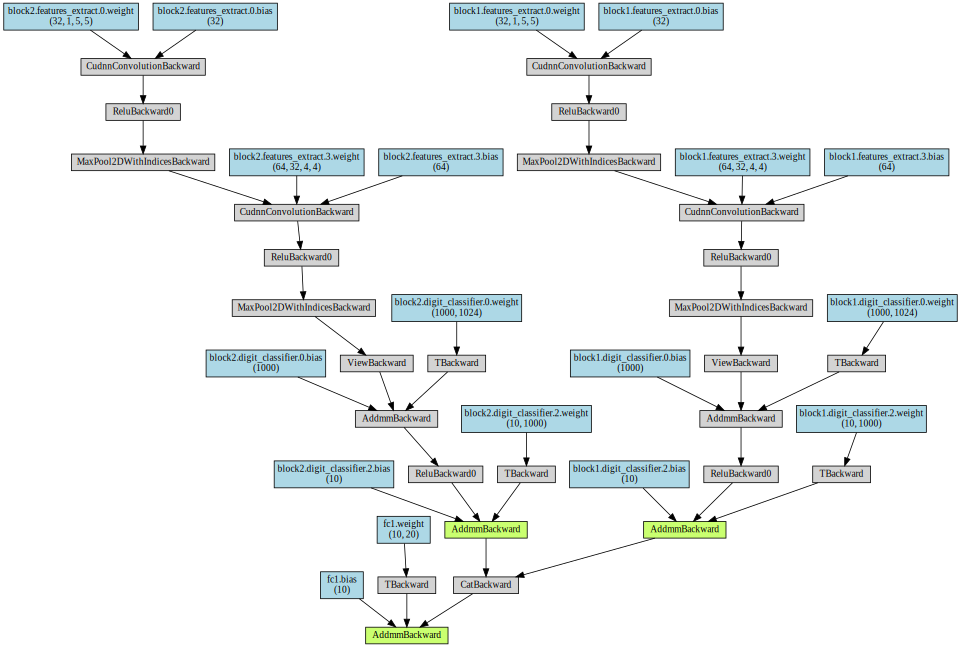

In [26]:
make_dot(model4(i.to('cuda')), params=dict(model4.named_parameters()))

---

In [27]:
# TODO

In [28]:
from architectures.NoWeightSharing_AuxLosses import NoWeightSharingAuxLosses, NoWeightSharingAuxLossesDataset

In [29]:
# %load_ext tensorboard
# %tensorboard --logdir ./logs

config_model5 = dict(
    logs_dir=f'./logs/NoWeightSharingAuxLosses/{datetime.now().strftime("%Y%m%d_%H%M%S")}',
    dataset=NoWeightSharingAuxLossesDataset,
    criterion=nn.CrossEntropyLoss(),
    optimizer=torch.optim.Adam,
    learning_rate=0.001,
    batch_size=batch_size,
    num_epochs=num_epochs,  # 250
    model=NoWeightSharingAuxLosses(), #'simple_conv',
    augmentation=False,
    verbose=0
)

df5, model5, history5 = collect_data_runs(config_model5, runs_num=runs_num)

0it [00:00, ?it/s]

---- Run 1/15 ----


9920512it [00:04, 2157149.52it/s]                             


Extracting ./data/mnist/NoWeightSharingAuxLossesDataset/raw/train-images-idx3-ubyte.gz


0it [00:00, ?it/s]

32768it [00:00, 52797.86it/s]                            
0it [00:00, ?it/s]

Extracting ./data/mnist/NoWeightSharingAuxLossesDataset/raw/train-labels-idx1-ubyte.gz


1654784it [00:01, 1353524.88it/s]                            
0it [00:00, ?it/s]

Extracting ./data/mnist/NoWeightSharingAuxLossesDataset/raw/t10k-images-idx3-ubyte.gz


8192it [00:05, 1549.55it/s]             

Extracting ./data/mnist/NoWeightSharingAuxLossesDataset/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!


---- Run 2/15 ----
---- Run 3/15 ----
---- Run 4/15 ----
---- Run 5/15 ----
---- Run 6/15 ----
---- Run 7/15 ----
---- Run 8/15 ----
---- Run 9/15 ----
---- Run 10/15 ----
---- Run 11/15 ----
---- Run 12/15 ----
---- Run 13/15 ----
---- Run 14/15 ----
---- Run 15/15 ----


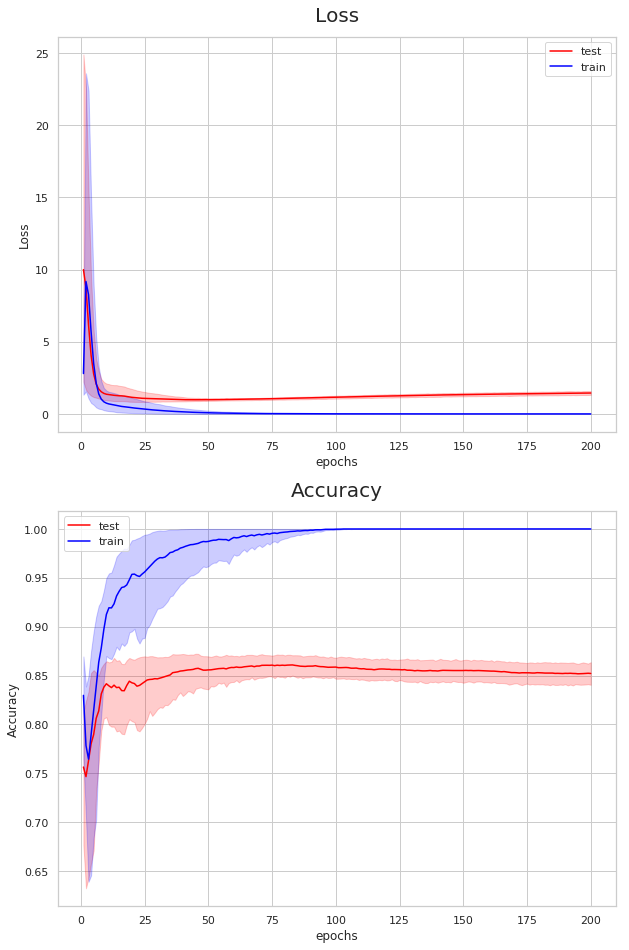

In [30]:
plot_result(df5)

In [31]:
config = dict(batch_size=128, dataset=NoWeightSharingAuxLossesDataset, augmentation=False, verbose=0)
training_loader, test_loader = get_dataset(config)
for i, j, k in training_loader:break

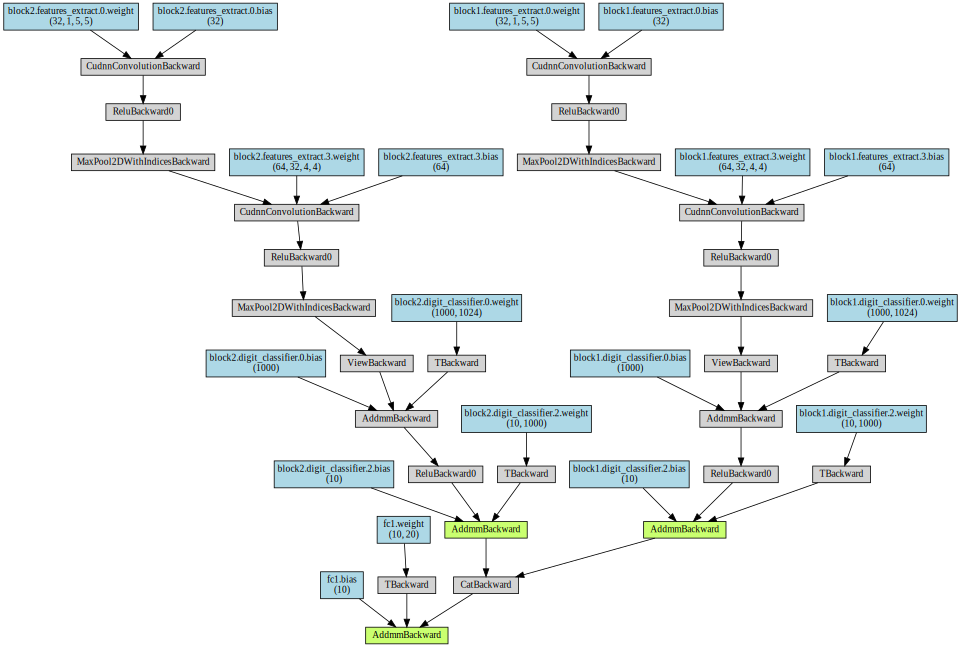

In [32]:
make_dot(model5(i.to('cuda')), params=dict(model5.named_parameters()))

---

In [33]:
from architectures.Linear import LinearDataset, Linear

In [34]:
# %load_ext tensorboard
# %tensorboard --logdir ./logs

config_model6 = dict(
    logs_dir=f'./logs/Linear/{datetime.now().strftime("%Y%m%d_%H%M%S")}',
    dataset=LinearDataset,
    criterion=nn.MSELoss(),
    optimizer=torch.optim.Adam,
    learning_rate=0.001,
    batch_size=batch_size,
    num_epochs=num_epochs,  # 250
    model=Linear(), #'simple_conv',
    augmentation=False,
    verbose=0
)

df6, model6, history6 = collect_data_runs(config_model6, runs_num=runs_num)

---- Run 1/15 ----
---- Run 2/15 ----
---- Run 3/15 ----
---- Run 4/15 ----
---- Run 5/15 ----
---- Run 6/15 ----
---- Run 7/15 ----
---- Run 8/15 ----
---- Run 9/15 ----
---- Run 10/15 ----
---- Run 11/15 ----
---- Run 12/15 ----
---- Run 13/15 ----
---- Run 14/15 ----
---- Run 15/15 ----


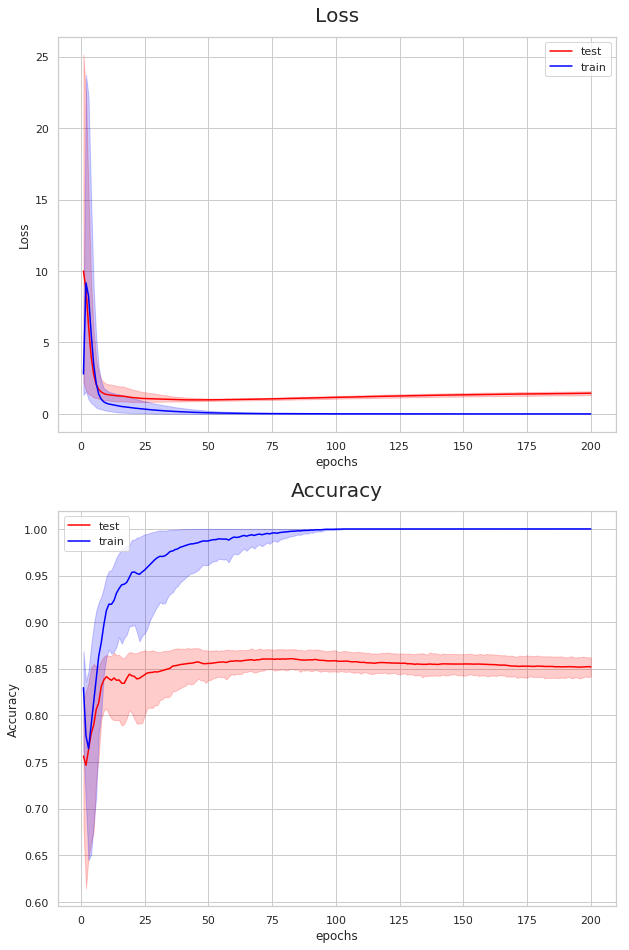

In [35]:
plot_result(df5)

In [36]:
config = dict(batch_size=128, dataset=LinearDataset, augmentation=False, verbose=0)
training_loader, test_loader = get_dataset(config)
for i, j, k in training_loader:break

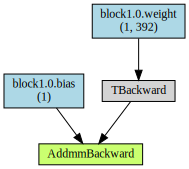

In [37]:
make_dot(model6(i.to('cuda')), params=dict(model6.named_parameters()))

---

In [38]:
from architectures.Logistic import LogisticDataset, Logistic

In [39]:
# %load_ext tensorboard
# %tensorboard --logdir ./logs

config_model7 = dict(
    logs_dir=f'./logs/Logistic/{datetime.now().strftime("%Y%m%d_%H%M%S")}',
    dataset=LogisticDataset,
    criterion=nn.MSELoss(),
    optimizer=torch.optim.Adam,
    learning_rate=0.001,
    batch_size=batch_size,
    num_epochs=num_epochs,  # 250
    model=Logistic(), #'simple_conv',
    augmentation=False,
    verbose=0
)

df7, model7, history7 = collect_data_runs(config_model7, runs_num=runs_num)

---- Run 1/15 ----
---- Run 2/15 ----
---- Run 3/15 ----
---- Run 4/15 ----
---- Run 5/15 ----
---- Run 6/15 ----
---- Run 7/15 ----
---- Run 8/15 ----
---- Run 9/15 ----
---- Run 10/15 ----
---- Run 11/15 ----
---- Run 12/15 ----
---- Run 13/15 ----
---- Run 14/15 ----
---- Run 15/15 ----


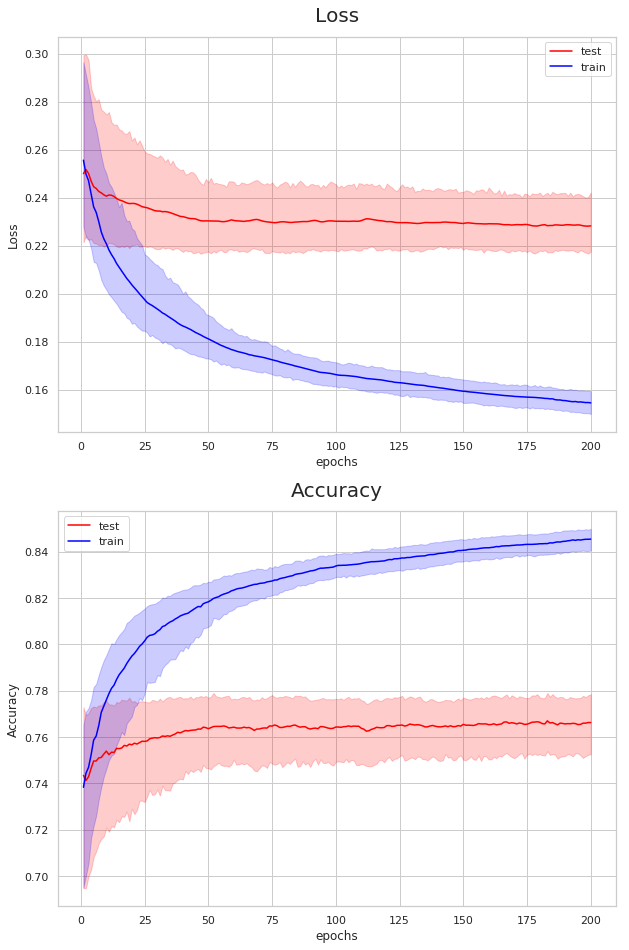

In [40]:
plot_result(df7)

In [41]:
config = dict(batch_size=128, dataset=LogisticDataset, augmentation=False, verbose=0)
training_loader, test_loader = get_dataset(config)
for i, j, k in training_loader:break

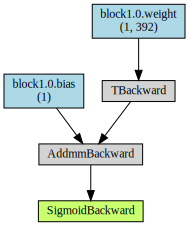

In [42]:
make_dot(model7(i.to('cuda')), params=dict(model7.named_parameters()))

---

# Performance

In [43]:
import matplotlib.pyplot as plt

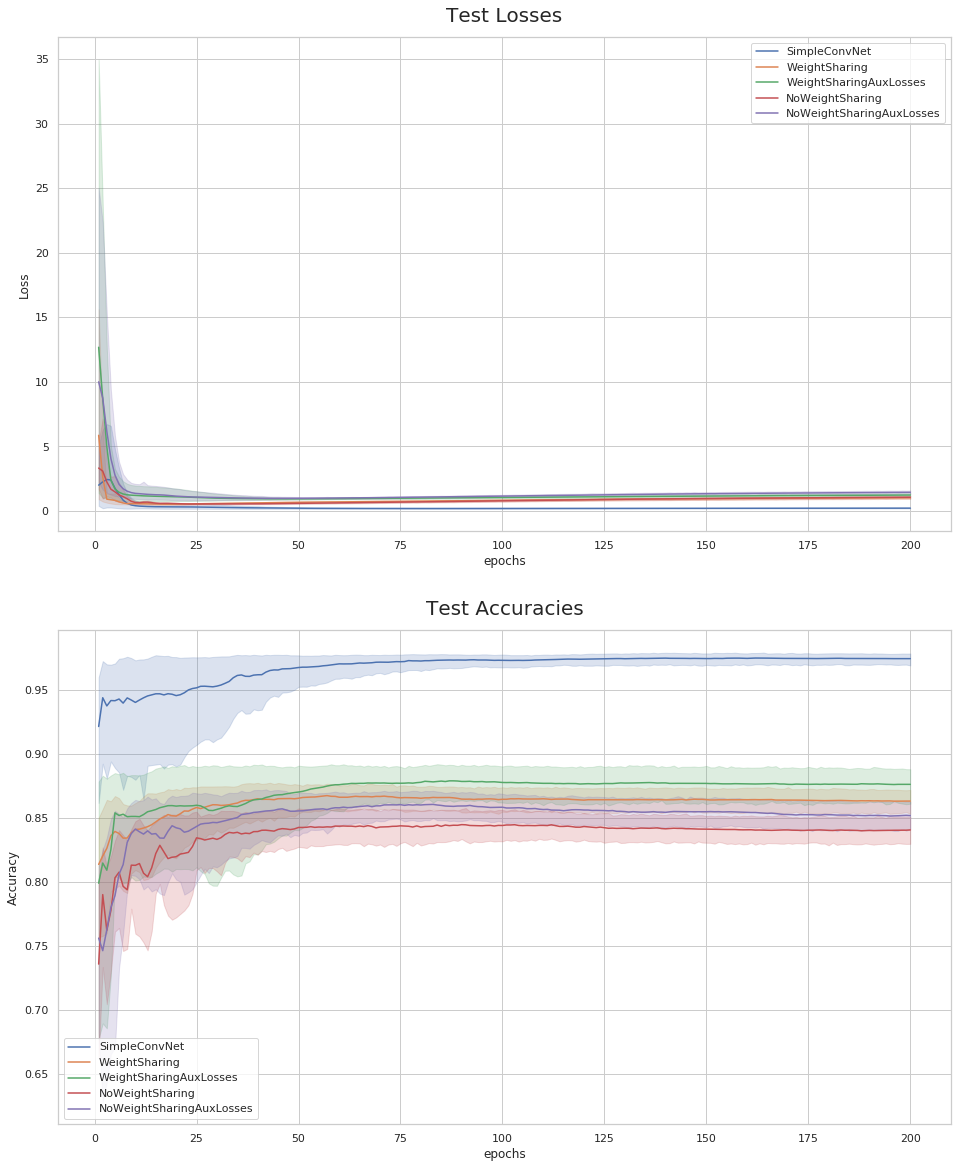

In [45]:
fig, axs = plt.subplots(2, 1, figsize=(16,20))
limit = 200
sns.lineplot(x="epoch", y="test_loss", data=df1, ax=axs[0], label="SimpleConvNet");
sns.lineplot(x="epoch", y="test_loss", data=df2, ax=axs[0], label="WeightSharing");
sns.lineplot(x="epoch", y="test_loss", data=df3, ax=axs[0], label="WeightSharingAuxLosses");
sns.lineplot(x="epoch", y="test_loss", data=df4, ax=axs[0], label="NoWeightSharing");
sns.lineplot(x="epoch", y="test_loss", data=df5, ax=axs[0], label="NoWeightSharingAuxLosses");
#sns.lineplot(x="epoch", y="test_loss", data=df6, ax=axs[0], label="Linear");
#sns.lineplot(x="epoch", y="test_loss", data=df7, ax=axs[0], label="Logistic");
axs[0].set_xlabel("epochs");axs[0].set_ylabel("Loss");axs[0].set_title("Test Losses", fontdict={"fontsize":20, "fontweight":1}, pad=15);
#axs[0].set_ylim(0, 10)
axs[0].legend();

sns.lineplot(x="epoch", y="test_accuracy", data=df1, ax=axs[1], label="SimpleConvNet");
sns.lineplot(x="epoch", y="test_accuracy", data=df2, ax=axs[1], label="WeightSharing");
sns.lineplot(x="epoch", y="test_accuracy", data=df3, ax=axs[1], label="WeightSharingAuxLosses");
sns.lineplot(x="epoch", y="test_accuracy", data=df4, ax=axs[1], label="NoWeightSharing");
sns.lineplot(x="epoch", y="test_accuracy", data=df5, ax=axs[1], label="NoWeightSharingAuxLosses");
#sns.lineplot(x="epoch", y="test_accuracy", data=df6, ax=axs[1], label="Linear");
#sns.lineplot(x="epoch", y="test_accuracy", data=df7, ax=axs[1], label="Logistic");
axs[1].set_xlabel("epochs");axs[1].set_ylabel("Accuracy");axs[1].set_title("Test Accuracies", fontdict={"fontsize":20, "fontweight":1}, pad=15);
axs[1].legend();

plt.show();

In [54]:
df1['network'] = df1.apply(lambda x: "SimpleConvNet", axis=1)
df2['network'] = df2.apply(lambda x: "WeightSharing", axis=1)
df3['network'] = df3.apply(lambda x: "WeightSharingAuxLosses", axis=1)
df4['network'] = df4.apply(lambda x: "NoWeightSharing", axis=1)
df5['network'] = df5.apply(lambda x: "NoWeightSharingAuxLosses", axis=1)
df6['network'] = df6.apply(lambda x: "Linear", axis=1)
df7['network'] = df7.apply(lambda x: "Logistic", axis=1)

In [109]:
df = pd.concat([df1, df3, df2, df5, df4, df7, df6])

In [151]:
import seaborn as sns; sns.set(); sns.set(style="whitegrid", color_codes=True)
import matplotlib.pyplot as plt
#sns.set(font_scale=0.5)

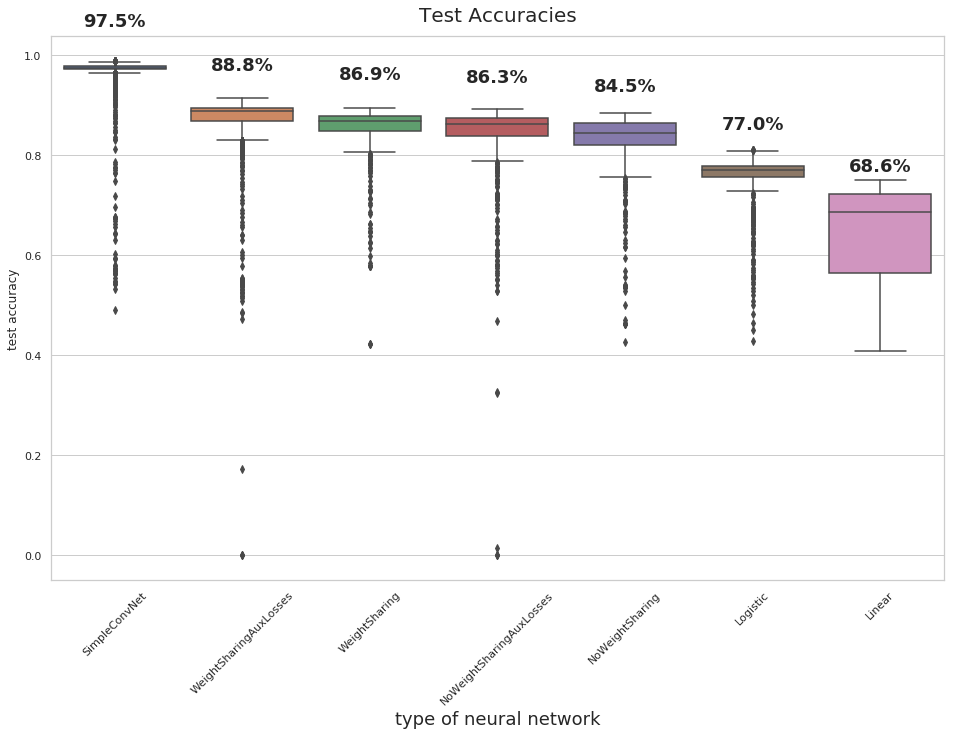

In [152]:
fig, ax = plt.subplots(figsize=(16,10))

box_plot = sns.boxplot(x="network", y="test_accuracy", data=df, ax=ax)
box_plot.set_xticklabels(box_plot.get_xticklabels(), rotation=45)
ax.set_xlabel("type of neural network", fontsize=18);ax.set_ylabel("test accuracy");ax.set_title("Test Accuracies", fontdict={"fontsize":20, "fontweight":1}, pad=15);


medians = df.groupby(['network'])['test_accuracy'].median().sort_values(ascending=False)
vertical_offset = df['test_accuracy'].mean() * 0.1 # offset from median for display

for xtick in box_plot.get_xticks():
    box_plot.text(xtick, 
                  medians[xtick] + vertical_offset, 
                  f"{medians[xtick]*100:.1f}%", 
                  horizontalalignment='center', 
                  size='x-small', weight='semibold', fontsize=18)

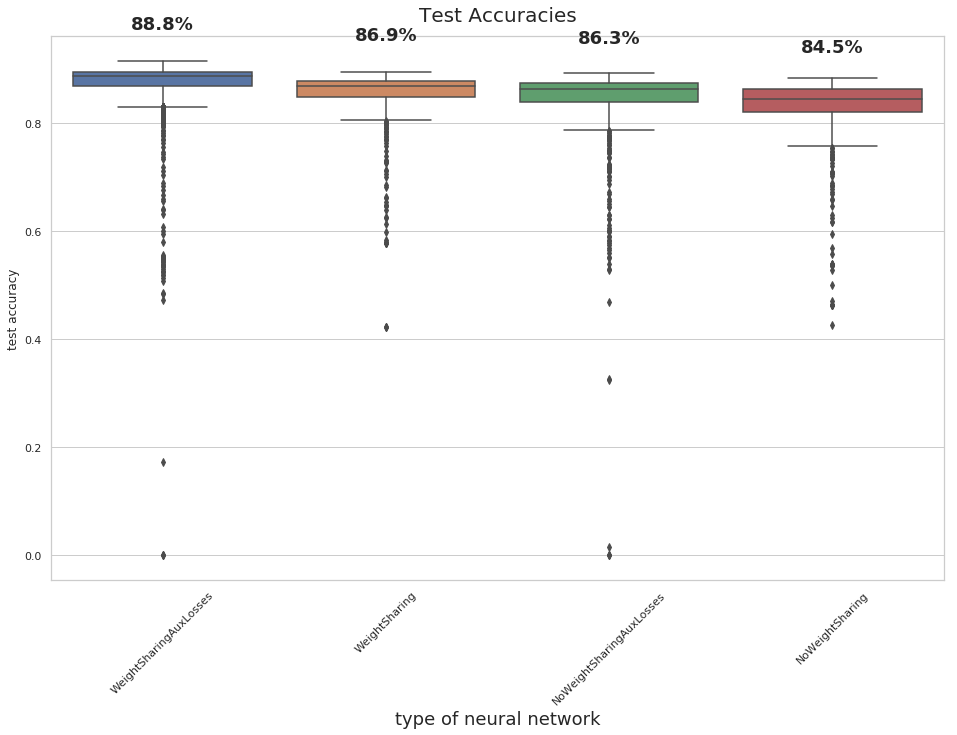

In [153]:
df = pd.concat([df3, df2, df5, df4])

fig, ax = plt.subplots(figsize=(16,10))

box_plot = sns.boxplot(x="network", y="test_accuracy", data=df, ax=ax)
box_plot.set_xticklabels(box_plot.get_xticklabels(), rotation=45)
ax.set_xlabel("type of neural network", fontsize=18);ax.set_ylabel("test accuracy");ax.set_title("Test Accuracies", fontdict={"fontsize":20, "fontweight":1}, pad=15);


medians = df.groupby(['network'])['test_accuracy'].median().sort_values(ascending=False)
vertical_offset = df['test_accuracy'].mean() * 0.1 # offset from median for display

for xtick in box_plot.get_xticks():
    box_plot.text(xtick, 
                  medians[xtick] + vertical_offset, 
                  f"{medians[xtick]*100:.1f}%", 
                  horizontalalignment='center', 
                  size='x-small', weight='semibold', fontsize=18)